# Variable transformers : BoxCoxTransformer

The BoxCoxTransformer() applies the BoxCox transformation to numerical
variables.

The Box-Cox transformation is defined as:

- T(Y)=(Y exp(λ)−1)/λ if λ!=0
- log(Y) otherwise

where Y is the response variable and λ is the transformation parameter. λ varies,
typically from -5 to 5. In the transformation, all values of λ are considered and
the optimal value for a given variable is selected.

**For this demonstration, we use the Ames House Prices dataset produced by Professor Dean De Cock:**

Dean De Cock (2011) Ames, Iowa: Alternative to the Boston Housing
Data as an End of Semester Regression Project, Journal of Statistics Education, Vol.19, No. 3

http://jse.amstat.org/v19n3/decock.pdf

https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627

The version of the dataset used in this notebook can be obtained from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from feature_engine.transformation import BoxCoxTransformer
from feature_engine.imputation import ArbitraryNumberImputer
from feature_engine.imputation import CategoricalImputer

In [2]:
#Read data
data = pd.read_csv('houseprice.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Id', 'SalePrice'], axis=1), data['SalePrice'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((1022, 79), (438, 79))

In [4]:
#initialize transformer
bct = BoxCoxTransformer(variables = ['LotArea', 'GrLivArea'])

bct.fit(X_train)

BoxCoxTransformer(variables=['LotArea', 'GrLivArea'])

In [5]:
# these are the exponents for the BoxCox transformation
bct.lambda_dict_

{'LotArea': 0.022716974992922984, 'GrLivArea': 0.06854346283829917}

In [6]:
#transforming variables
train_t = bct.transform(X_train)
test_t = bct.transform(X_test)

<AxesSubplot:>

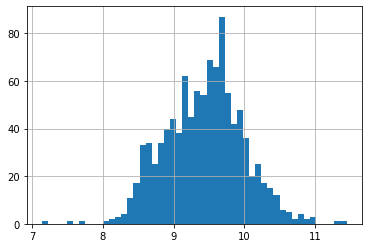

In [7]:
# transformed variable
train_t['GrLivArea'].hist(bins=50)

<AxesSubplot:>

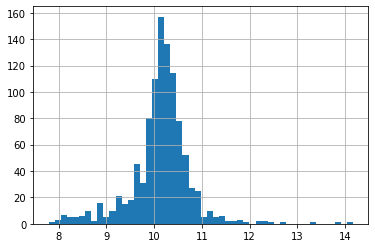

In [8]:
# transformed variable
train_t['LotArea'].hist(bins=50)

### Automatically select numerical variables

We select all numerical variables if no variables are passed. 


In [9]:
#initialize transformer for imputing missing values
arbitrary_imputer = ArbitraryNumberImputer(arbitrary_number=2)
arbitrary_imputer.fit(X_train)

ArbitraryNumberImputer(arbitrary_number=2,
                       variables=['MSSubClass', 'LotFrontage', 'LotArea',
                                  'OverallQual', 'OverallCond', 'YearBuilt',
                                  'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
                                  'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
                                  '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                                  'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
                                  'FullBath', 'HalfBath', 'BedroomAbvGr',
                                  'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
                                  'GarageYrBlt', 'GarageCars', 'GarageArea',
                                  'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', ...])

In [10]:
#transforming variables
train_t = arbitrary_imputer.transform(X_train)
test_t = arbitrary_imputer.transform(X_test)

In [11]:
# Keeing only numeric variables
train_t=train_t[arbitrary_imputer.variables]
test_t=test_t[arbitrary_imputer.variables]

In [12]:
#keeping only variables that have values  >=1 (we can do 1/0)
new_variables=list(train_t.ge(1).all(0)[train_t.ge(1).all(0)==True].index)
train_t=train_t[new_variables]
test_t=test_t[new_variables]

In [13]:
#keeping only variables that have values  >=1 (we can do 1/0)
new_variables=list(train_t.le(50).all(0)[train_t.le(50).all(0)==True].index)
train_t=train_t[new_variables]
test_t=test_t[new_variables]

In [14]:
#initialize transformer 
bct_default = BoxCoxTransformer()

bct_default.fit(train_t)

BoxCoxTransformer(variables=['OverallQual', 'OverallCond', 'TotRmsAbvGrd',
                             'MoSold'])

<AxesSubplot:>

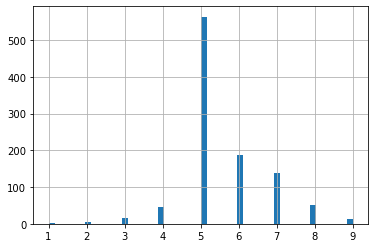

In [15]:
# before transforming variable
train_t['OverallCond'].hist(bins=50)

<AxesSubplot:>

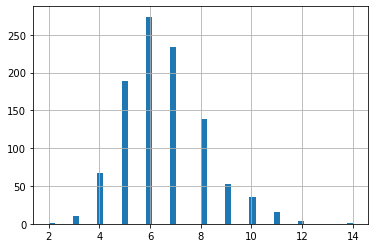

In [16]:
# before transforming variable
train_t['TotRmsAbvGrd'].hist(bins=50)

In [17]:
#transforming variables
train_t = bct_default.transform(train_t)
test_t = bct_default.transform(test_t)

<AxesSubplot:>

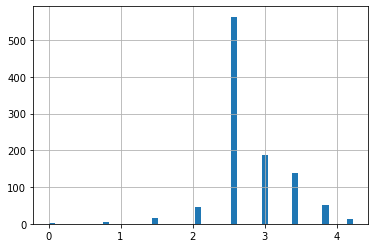

In [18]:
# transformed variable
train_t['OverallCond'].hist(bins=50)

<AxesSubplot:>

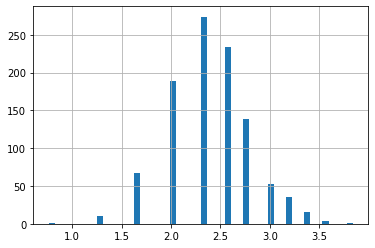

In [19]:
# transformed variable
train_t['TotRmsAbvGrd'].hist(bins=50)